[[1. 1.]
 [2. 1.]
 [2. 2.]
 [3. 2.]]
Distance Matrix D
[[0.         1.         1.41421356 2.23606798]
 [1.         0.         1.         1.41421356]
 [1.41421356 1.         0.         1.        ]
 [2.23606798 1.41421356 1.         0.        ]]

Eigenvalues of the distance matrix = [ 4.11010003 -0.87403205 -0.87403205 -2.36203593]

B matix
[[ 1.25+0.j  0.25+0.j -0.25+0.j -1.25+0.j]
 [ 0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j]
 [-0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]
 [-1.25+0.j -0.25+0.j  0.25+0.j  1.25+0.j]]
Eigenvalues = [ 2.61803399e+00+0.j  3.81966011e-01+0.j  5.16971318e-16+0.j
 -2.60247278e-16+0.j]

Matrix X
[[ 1.11351636e+00+0.00000000e+00j -1.00405708e-01+0.00000000e+00j
   1.56983095e-08+0.00000000e+00j  0.00000000e+00+2.78957386e-10j]
 [ 2.62865556e-01+0.00000000e+00j  4.25325404e-01+0.00000000e+00j
  -3.47112903e-09+0.00000000e+00j  0.00000000e+00+1.14037635e-08j]
 [-2.62865556e-01+0.00000000e+00j -4.25325404e-01+0.00000000e+00j
  -3.47112903e-09+0.00000000e+00j  0.00000000e+

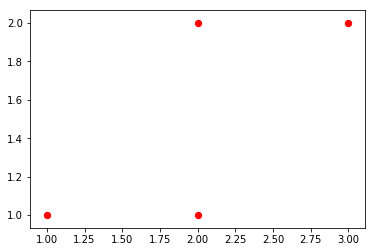

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import numpy
import matplotlib.pyplot as plt
import sys


def bval(D, r, s):
    n = D.shape[0]
    total_r = numpy.sum(D[:,s] ** 2)
    total_s = numpy.sum(D[r,:] ** 2)
    total = numpy.sum(D ** 2)
    val = (D[r,s] ** 2) - (float(total_r) / float(n)) - (float(total_s) / float(n)) + (float(total) / float(n * n))
    return -0.5 * val


def main():  
    n = 4  
    Y = numpy.array([[1,1], [2,1], [2,2],[3,2]], dtype=float)
    print (Y)
    D = numpy.zeros((n, n), dtype=float)
    for i in range(0, n):
        for j in range(0, n):
            D[i, j] = numpy.linalg.norm(Y[i,:] - Y[j,:]) 
    B = numpy.zeros((n, n), dtype=complex)
    for i in range(0, n):
        for j in range(0, n):
            B[i,j] = bval(D, i, j)
    print( "Distance Matrix D")
    print( D)
    w, V = numpy.linalg.eig(D)   
    idx = w.argsort()[::-1]
    w = w[idx]
    V = V[:,idx]
    print ("\nEigenvalues of the distance matrix =", w)
    print ("\nB matix")
    print( B)
    g, U = numpy.linalg.eig(B)
    idx = g.argsort()[::-1]
    g = g[idx]
    U = U[:,idx]
    print( "Eigenvalues =", g)
    G = numpy.diag(numpy.sqrt(g))
    X = numpy.dot(U, G)
    print ("\nMatrix X")
    print( X)
    error = 0.0
    total = 0
    for i in range(0, n):
        for j in range(i+1, n):
            error += (numpy.linalg.norm(X[i] - X[j]) - D[i, j]) ** 2
            total += 1
    RMSE = numpy.sqrt(error / float(total))
    print ("RMSE =", RMSE)
    if RMSE > 0:
        #plt.scatter(X[:,0], X[:,1], c='b', s=40)
        plt.scatter(Y[:,0], Y[:,1], c='r', s=40)
        plt.show()
        sys.exit(1)
    pass

if __name__ == '__main__':
    main()



1.5


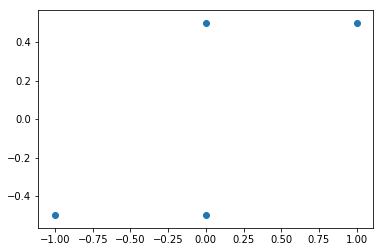

In [8]:
import statistics as st
import numpy as np
x = [1,2,2,3]
y = [1,1,2,2]
meanX = st.mean(x)
meanY = st.mean(y)
x = np.array(x)
y = np.array(y)
meanSubX = x - meanX
meanSubY = y - meanY
plt.scatter(meanSubX, meanSubY)
print(meanY)

In [10]:
import math
trans = np.array([meanSubX,meanSubY])
matrix = trans.transpose()
multiply = np.dot(matrix, trans)
eigenVal, eigenVect = np.linalg.eig(multiply)
print(eigenVal)
print(eigenVect)
largEigenVect = eigenVect[:,0]
largEigenVal = math.sqrt(eigenVal[0])
proj= largEigenVal * largEigenVect
proj

[ 2.61803399e+00  3.81966011e-01 -9.45799730e-17 -2.55373581e-17]
[[-0.68819096  0.16245985  0.67618941  0.02708022]
 [-0.16245985 -0.68819096  0.20680399  0.70658804]
 [ 0.16245985  0.68819096  0.20680399  0.70658804]
 [ 0.68819096 -0.16245985  0.67618941  0.02708022]]


array([-1.11351636, -0.26286556,  0.26286556,  1.11351636])